# Import

In [23]:
import numpy as np
import pandas as pd
from collections import Counter
import random
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Library Bantuan

from IPython.display import display
from tqdm import tqdm
from pprint import pprint
import time
import warnings
warnings.filterwarnings('ignore')


# Library Sendiri
from libraryBantuan.gameKatla import GameKatla
from libraryBantuan.tree import DecisionTree

# Konstanta
PATH_FILE_TEXT = "D:\\Rama Nitip\\python\\katla\\file text\\"

# Baca Data

In [2]:
daftar_kata = list(pd.read_csv(PATH_FILE_TEXT + 'lima huruf katla.csv', header=None)[0])
list_jawaban = random.choices(daftar_kata, k=20)
print(f"Banyak Kata : {len(daftar_kata)}")

Banyak Kata : 8314


# Ambil model

In [ ]:
df_hasil = pd.DataFrame({'kata':[], 'rata rata':[], 'kalah':[]})
for kata_pertama in tqdm(daftar_kata):
    DT = DecisionTree()
    DT.buat_tree(daftar_kata, kata_pertama)
    rata_rata = 0
    kalah = 0
    for jawaban in daftar_kata:
        DT.now = DT.root                    # reset now menjadi di root
        game = GameKatla(daftar_kata, jawaban)
        tanya = 0
        tebakan = kata_pertama
        pola = game.evaluasi_tebakan(tebakan)
        tanya += 1
        while pola != "!!!!!":
            tebakan = DT.kata_berikutnya(pola)
            pola    = game.evaluasi_tebakan(tebakan)
            tanya  += 1 

        rata_rata += tanya
        kalah     += tanya if tanya>6 else 0
    
    rata_rata /= len(daftar_kata)
    new_data = pd.DataFrame({'kata':[kata_pertama], 'rata rata':[rata_rata], 'kalah':[kalah]})
    df_hasil = pd.concat([df_hasil, new_data], ignore_index=True)
    df_hasil.to_csv(PATH_FILE_TEXT+"hasil semua kata pertama.csv", index=False)
    

# Pakai kata yang peluang jadi jawaban saja

,tanya,banyaknya,daftar kata
0,1,1,[sarit]
1,2,197,"[abrip, adpis, afkir, afrit, aktip, albit, amb..."
2,3,2130,"[abdis, ablur, abnus, abras, abrin, absen, abs..."
3,4,3310,"[abadi, abaka, abate, abawi, abaya, abbas, abd..."
4,5,1620,"[abang, abdas, abrar, abuza, abyad, acawi, aci..."
5,6,623,"[acang, adzan, afian, ajing, ajuan, ajung, amp..."
6,7,265,"[ahang, ajian, amung, anyar, babar, babas, bab..."
7,8,103,"[agung, ajang, anian, baban, bahar, bapak, bay..."
8,9,38,"[anang, apung, bawak, bayan, bayar, cacar, gah..."
9,10,17,"[awang, babak, bazar, capar, lawak, lelas, mar..."


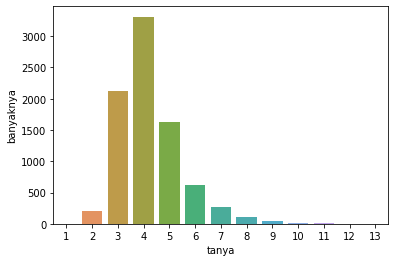

In [ ]:
tanya = jumlah_bertanya.keys()
banyaknya = [i[0] for i in list(jumlah_bertanya.values())]
kata = [i[1] for i in list(jumlah_bertanya.values())]

df = pd.DataFrame({'tanya':tanya, 'banyaknya':banyaknya, 'daftar kata':kata}).sort_values(by='tanya')
display(df)

sns.barplot(x=df['tanya'], y=df['banyaknya']);

# Huruf yang paling banyak muncul

In [51]:
all_kata = ''.join(daftar_kata)
huruf_sering = [huruf[0] for huruf in Counter(all_kata).most_common(10)]
huruf_sering

['a', 'e', 'i', 'u', 'k', 'r', 't', 's', 'l', 'n']

In [42]:
huruf_sering.difference(set(['a', 'b', 'r', 'm']))

{'e', 'i', 'k', 'l', 'n', 's', 't', 'u'}

# Coba

In [44]:
df = [kata for kata in daftar_kata if len(set(kata))==5]
(list_kata1, list_kata2, banyak_sama) = ([], [], []) 

for i1 in range(len(df)-1):
    for i2 in range(i1+1, len(df)):
        kata1 = df[i1]
        kata2 = df[i2]
        if len(set(kata1).union(set(kata2)))==10:
            list_kata1.append(kata1)
            list_kata2.append(kata2)
            banyak_sama.append(len(huruf_sering.intersection(set(kata1))) + 
                                len(huruf_sering.intersection(set(kata2)))
                              )


seluruh_hasil = pd.DataFrame({'kata 1':list_kata1, 'kata 2':list_kata2, 'banyak':banyak_sama})
seluruh_hasil

,kata 1,kata 2,banyak
0,abdis,ceguk,6
1,abdis,cekuh,6
2,abdis,cekup,6
3,abdis,cekur,7
4,abdis,cekut,7
...,...,...,...
1146989,yurin,zelot,7
1146990,yurin,zohal,6
1146991,yuris,zelot,7
1146992,yuris,zohal,6


In [46]:
seluruh_hasil.sort_values(by='banyak', ascending=False)

,kata 1,kata 2,banyak
907400,lekas,rutin,10
926374,likat,senur,10
916858,lerik,nasut,10
457101,eksil,rutan,10
919792,letak,unsri,10
...,...,...,...
374513,decup,mboja,3
511828,fjord,gempa,3
186295,bogem,fidah,3
531379,fyord,gibah,3


In [50]:
kata12 = set("lekasrutin")
kata3 = []

for kata in daftar_kata:
    if len(kata12.intersection(set(kata)))==0:
        kata3.append(kata)

print(len(kata3))
print(kata3)


9
['bodoh', 'bomoh', 'dohyo', 'gocoh', 'gogoh', 'gopoh', 'jodoh', 'jompo', 'mbojo']


In [54]:
Counter(all_kata).most_common(15)

[('a', 6505),
 ('e', 3143),
 ('i', 3057),
 ('u', 2844),
 ('k', 2736),
 ('r', 2517),
 ('t', 2246),
 ('s', 2225),
 ('l', 2099),
 ('n', 2083),
 ('o', 1905),
 ('p', 1550),
 ('m', 1522),
 ('b', 1448),
 ('d', 1209)]